In [47]:
import csv
import numpy as np
import scipy.integrate
import illustris_python as il
import matplotlib.pyplot as plt

In [2]:
# load gas metallicity data

gSFR = []
with open('./SFR_gas_sfr_weighted', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        gSFR.append(row)

In [3]:
# convert gas metallicity data to float

gSFR_Z040 = []
gSFR_Z030 = []
gSFR_Z020 = []
gSFR_Z014 = []
gSFR_Z010 = []
gSFR_Z008 = []
gSFR_Z006 = []
gSFR_Z004 = []
gSFR_Z003 = []
gSFR_Z002 = []
gSFR_Z001 = []
gSFR_Zem4 = []
gSFR_Zem5 = []
for num in gSFR[0]:
    gSFR_Z040.append(float(num))
for num in gSFR[1]:
    gSFR_Z030.append(float(num))
for num in gSFR[2]:
    gSFR_Z020.append(float(num))
for num in gSFR[3]:
    gSFR_Z014.append(float(num))
for num in gSFR[4]:
    gSFR_Z010.append(float(num))
for num in gSFR[5]:
    gSFR_Z008.append(float(num))
for num in gSFR[6]:
    gSFR_Z006.append(float(num))
for num in gSFR[7]:
    gSFR_Z004.append(float(num))
for num in gSFR[8]:
    gSFR_Z003.append(float(num))
for num in gSFR[9]:
    gSFR_Z002.append(float(num))
for num in gSFR[10]:
    gSFR_Z001.append(float(num))
for num in gSFR[11]:
    gSFR_Zem4.append(float(num))
for num in gSFR[12]:
    gSFR_Zem5.append(float(num))

In [4]:
# load stellar metallicity data

sSFR = []
with open('./SFR_stellar', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        sSFR.append(row)

In [5]:
# convert stellar metallicity data to float

sSFR_Z040 = []
sSFR_Z030 = []
sSFR_Z020 = []
sSFR_Z010 = []
sSFR_Z008 = []
sSFR_Z006 = []
sSFR_Z004 = []
sSFR_Z003 = []
sSFR_Z002 = []
sSFR_Z001 = []
sSFR_Zem4 = []
sSFR_Zem5 = []
for num in sSFR[0]:
    sSFR_Z040.append(float(num))
for num in sSFR[1]:
    sSFR_Z030.append(float(num))
for num in sSFR[2]:
    sSFR_Z020.append(float(num))
for num in sSFR[3]:
    sSFR_Z010.append(float(num))
for num in sSFR[4]:
    sSFR_Z008.append(float(num))
for num in sSFR[5]:
    sSFR_Z006.append(float(num))
for num in sSFR[6]:
    sSFR_Z004.append(float(num))
for num in sSFR[7]:
    sSFR_Z003.append(float(num))
for num in sSFR[8]:
    sSFR_Z002.append(float(num))
for num in sSFR[9]:
    sSFR_Z001.append(float(num))
for num in sSFR[10]:
    sSFR_Zem4.append(float(num))
for num in sSFR[11]:
    sSFR_Zem5.append(float(num))

In [6]:
# reduce data (remove zeros)

In [48]:
basePath = './sims.TNG/TNG100-1/output/'

In [49]:
snapshots = np.linspace(1, 100, 99, endpoint=False).tolist()
redshifts = []
for snap in snapshots:
    redshifts.append(il.groupcat.loadHeader(basePath, snap)['Redshift'])
redshifts = redshifts[:-1]
redshifts.append(int(0))

In [9]:
def lookback(z, omega_M, omega_L, h):
    '''
    Calculates the lookback time according to a specific cosmology.

    Parameters:
    z : float
        The redshift at which the lookback time is to be calculated
    omega_M : float
        The matter density parameter (0.30897)
    omega_L : float
        The dark energy density parameter (0.6911)
    h : float
        The hubble parameter (0.6774)
    '''
    def f(x):
        a = np.sqrt(omega_M*(1+x)**3 + omega_L)
        return 1/((1+x)*a)
    t_hubble = (1/(100*h))*3.0856776*10**19
    return t_hubble*scipy.integrate.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

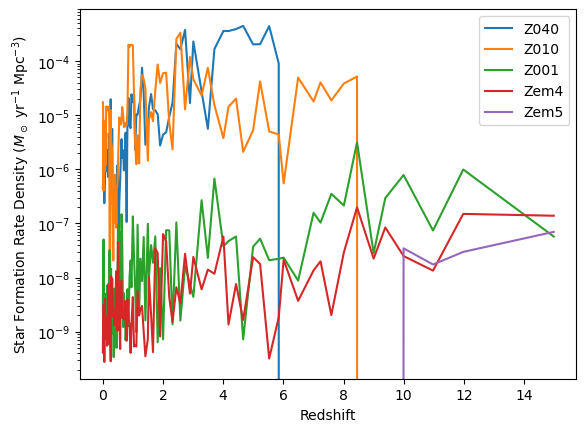

In [10]:
# unfiltered SFH data (gas sfr weighted metallicity) against redshift (similar to Figure4 in Briel paper)

plt.plot(redshifts, gSFR_Z040, label='Z040')
#plt.plot(redshifts, SFR[1], label='Z030')
#plt.plot(redshifts, SFR[2], label='Z020')
plt.plot(redshifts, gSFR_Z010, label='Z010')
#plt.plot(redshifts, SFR[4], label='Z008')
#plt.plot(redshifts, SFR[5], label='Z006')
#plt.plot(redshifts, SFR[6], label='Z004')
#plt.plot(redshifts, SFR[7], label='Z003')
#plt.plot(redshifts, SFR[8], label='Z002')
plt.plot(redshifts, gSFR_Z001, label='Z001')
plt.plot(redshifts, gSFR_Zem4, label='Zem4')
plt.plot(redshifts, gSFR_Zem5, label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

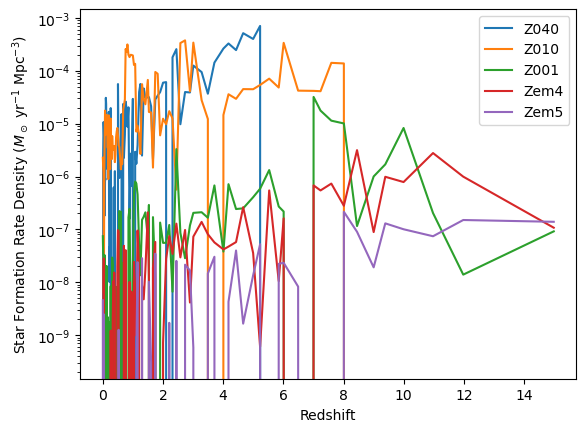

In [11]:
# unfiltered SFH data (stellar metallicity) against redshift (similar to Figure4 in Briel paper)

plt.plot(redshifts, sSFR_Z040, label='Z040')
plt.plot(redshifts, sSFR_Z010, label='Z010')
plt.plot(redshifts, sSFR_Z001, label='Z001')
plt.plot(redshifts, sSFR_Zem4, label='Zem4')
plt.plot(redshifts, sSFR_Zem5, label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [12]:
# summing gas SFR weighted metallicity with stellar metallicity values

tSFR_Z040 = [x + y for x, y in zip(gSFR_Z040, sSFR_Z040)]
tSFR_Z030 = [x + y for x, y in zip(gSFR_Z030, sSFR_Z030)]
tSFR_Z020 = [x + y for x, y in zip(gSFR_Z020, sSFR_Z020)]
tSFR_Z010 = [x + y for x, y in zip(gSFR_Z010, sSFR_Z010)]
tSFR_Z008 = [x + y for x, y in zip(gSFR_Z008, sSFR_Z008)]
tSFR_Z006 = [x + y for x, y in zip(gSFR_Z006, sSFR_Z006)]
tSFR_Z004 = [x + y for x, y in zip(gSFR_Z004, sSFR_Z004)]
tSFR_Z003 = [x + y for x, y in zip(gSFR_Z003, sSFR_Z003)]
tSFR_Z002 = [x + y for x, y in zip(gSFR_Z002, sSFR_Z002)]
tSFR_Z001 = [x + y for x, y in zip(gSFR_Z001, sSFR_Z001)]
tSFR_Zem4 = [x + y for x, y in zip(gSFR_Zem4, sSFR_Zem4)]
tSFR_Zem5 = [x + y for x, y in zip(gSFR_Zem5, sSFR_Zem5)]

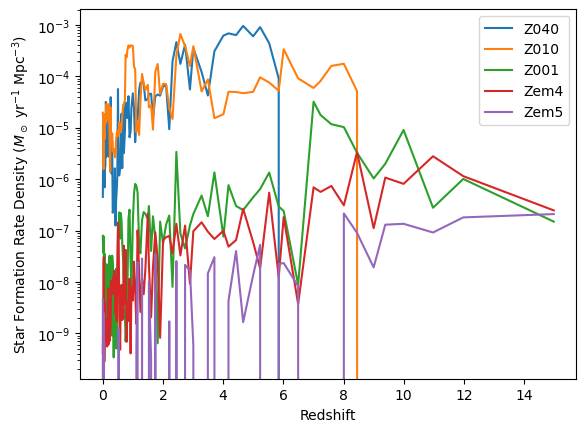

In [13]:
plt.plot(redshifts, tSFR_Z040, label='Z040')
plt.plot(redshifts, tSFR_Z010, label='Z010')
plt.plot(redshifts, tSFR_Z001, label='Z001')
plt.plot(redshifts, tSFR_Zem4, label='Zem4')
plt.plot(redshifts, tSFR_Zem5, label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [14]:
# summing over all metallicities

gas_all = [gSFR_Z040, gSFR_Z030, gSFR_Z020, gSFR_Z014, gSFR_Z010, gSFR_Z008, gSFR_Z006, gSFR_Z004, gSFR_Z003, gSFR_Z002, gSFR_Z001, gSFR_Zem4, gSFR_Zem5]

In [20]:
gas_total = []
for i in range(100):
    gas_total.append(float(gSFR_Z040[i])+float(gSFR_Z030[i])+float(gSFR_Z020[i])+float(gSFR_Z014[i])+float(gSFR_Z010[i])+float(gSFR_Z008[i])+float(gSFR_Z006[i])+float(gSFR_Z004[i])+float(gSFR_Z003[i])+float(gSFR_Z002[i])+float(gSFR_Z001[i])+float(gSFR_Zem4[i])+float(gSFR_Zem5[i]))

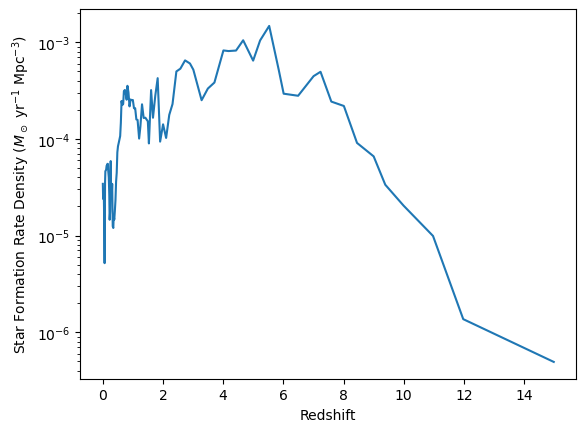

In [23]:
plt.plot(redshifts, gas_total)
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.show()

In [ ]:
# comparing with the Briel data/plot

In [28]:
import h5py
from hoki.constants import *

data = h5py.File('./data.h5', 'r')
SFH = data["SFH"]
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

In [32]:
print(BPASS_METALLICITIES)

['zem5', 'zem4', 'z001', 'z002', 'z003', 'z004', 'z006', 'z008', 'z010', 'z014', 'z020', 'z030', 'z040']


(0.0, 15.0)

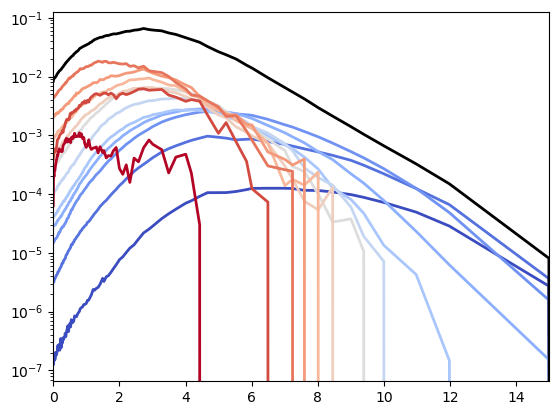

In [31]:
cmap = plt.get_cmap("coolwarm", len(BPASS_METALLICITIES))
for i, Z in enumerate(BPASS_METALLICITIES):
    plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][i], color=cmap(i), lw=2)
plt.plot(SFH['TNG'].attrs["redshift"], np.sum(SFH["TNG"], axis=0), color='black', lw=2)
plt.yscale('log')
plt.xlim(0, 15)

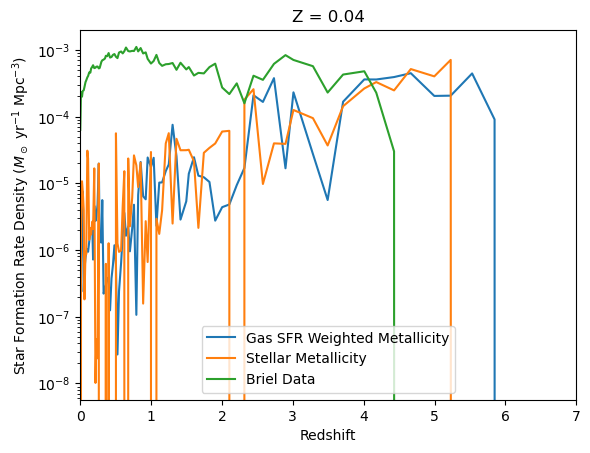

In [42]:
plt.plot(redshifts, gSFR_Z040, label='Gas SFR Weighted Metallicity')
plt.plot(redshifts, sSFR_Z040, label='Stellar Metallicity')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][12], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 7)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Z = 0.04')
plt.legend()

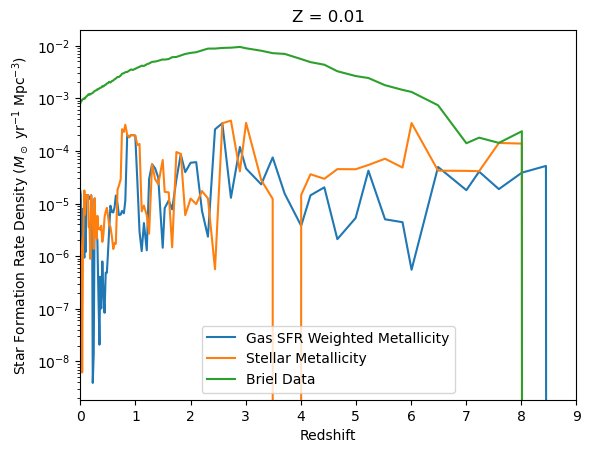

In [43]:
plt.plot(redshifts, gSFR_Z010, label='Gas SFR Weighted Metallicity')
plt.plot(redshifts, sSFR_Z010, label='Stellar Metallicity')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][8], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Z = 0.01')
plt.legend()

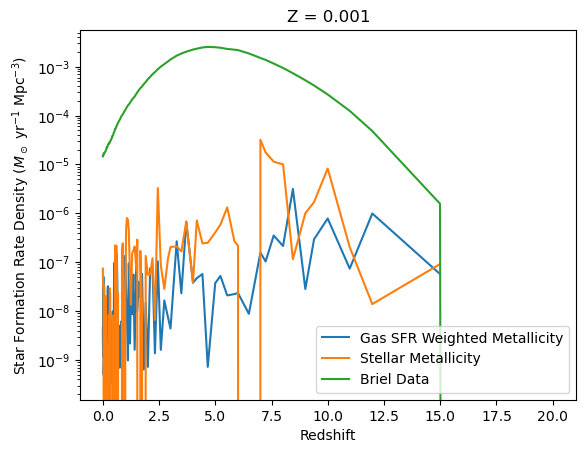

In [44]:
plt.plot(redshifts, gSFR_Z001, label='Gas SFR Weighted Metallicity')
plt.plot(redshifts, sSFR_Z001, label='Stellar Metallicity')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][2], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Z = 0.001')
plt.legend()

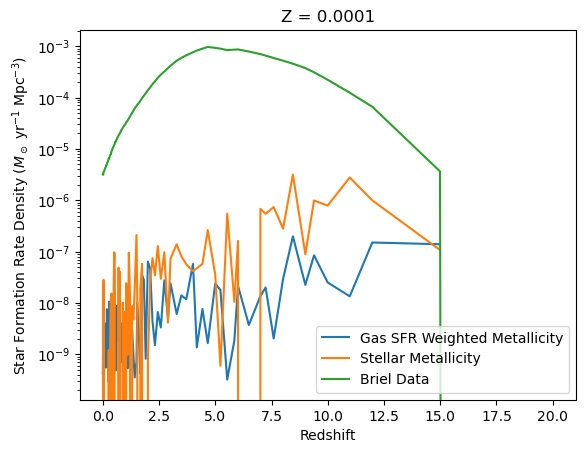

In [45]:
plt.plot(redshifts, gSFR_Zem4, label='Gas SFR Weighted Metallicity')
plt.plot(redshifts, sSFR_Zem4, label='Stellar Metallicity')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][1], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Z = 0.0001')
plt.legend()

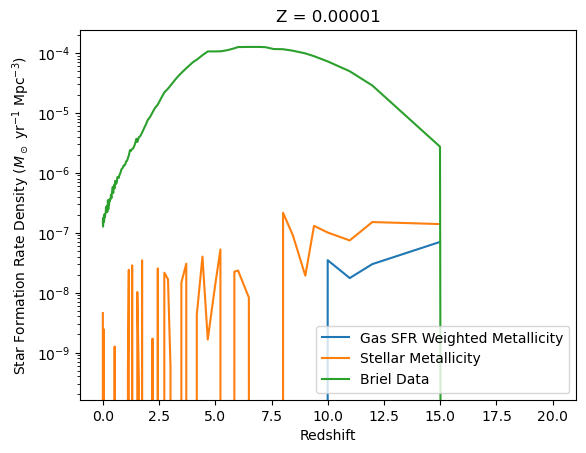

In [46]:
plt.plot(redshifts, gSFR_Zem5, label='Gas SFR Weighted Metallicity')
plt.plot(redshifts, sSFR_Zem5, label='Stellar Metallicity')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][0], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Z = 0.00001')
plt.legend()

In [ ]:
# including all galaxies (including those not of cosmic origin)

In [51]:
gcSFR = []
with open('./SFR_cosmic_gas_sfr_weighted', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        gcSFR.append(row)

In [52]:
gcSFR_Z040 = []
gcSFR_Z030 = []
gcSFR_Z020 = []
gcSFR_Z014 = []
gcSFR_Z010 = []
gcSFR_Z008 = []
gcSFR_Z006 = []
gcSFR_Z004 = []
gcSFR_Z003 = []
gcSFR_Z002 = []
gcSFR_Z001 = []
gcSFR_Zem4 = []
gcSFR_Zem5 = []
for num in gcSFR[0]:
    gcSFR_Z040.append(float(num))
for num in gcSFR[1]:
    gcSFR_Z030.append(float(num))
for num in gcSFR[2]:
    gcSFR_Z020.append(float(num))
for num in gcSFR[3]:
    gcSFR_Z014.append(float(num))
for num in gcSFR[4]:
    gcSFR_Z010.append(float(num))
for num in gcSFR[5]:
    gcSFR_Z008.append(float(num))
for num in gcSFR[6]:
    gcSFR_Z006.append(float(num))
for num in gcSFR[7]:
    gcSFR_Z004.append(float(num))
for num in gcSFR[8]:
    gcSFR_Z003.append(float(num))
for num in gcSFR[9]:
    gcSFR_Z002.append(float(num))
for num in gcSFR[10]:
    gcSFR_Z001.append(float(num))
for num in gcSFR[11]:
    gcSFR_Zem4.append(float(num))
for num in gcSFR[12]:
    gcSFR_Zem5.append(float(num))

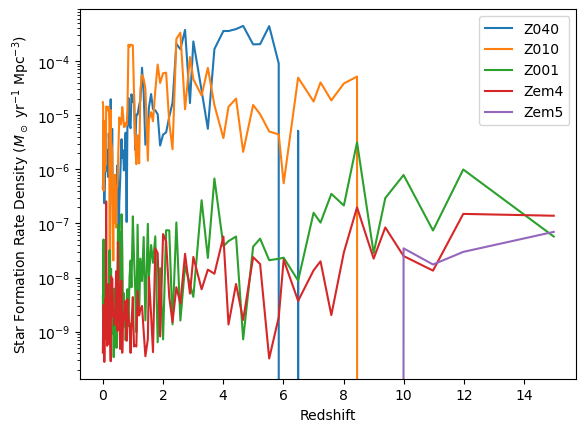

In [53]:
plt.plot(redshifts, gcSFR_Z040, label='Z040')
#plt.plot(redshifts, SFR[1], label='Z030')
#plt.plot(redshifts, SFR[2], label='Z020')
plt.plot(redshifts, gcSFR_Z010, label='Z010')
#plt.plot(redshifts, SFR[4], label='Z008')
#plt.plot(redshifts, SFR[5], label='Z006')
#plt.plot(redshifts, SFR[6], label='Z004')
#plt.plot(redshifts, SFR[7], label='Z003')
#plt.plot(redshifts, SFR[8], label='Z002')
plt.plot(redshifts, gcSFR_Z001, label='Z001')
plt.plot(redshifts, gcSFR_Zem4, label='Zem4')
plt.plot(redshifts, gcSFR_Zem5, label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [54]:
scSFR = []
with open('./SFR_cosmic_stellar', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        scSFR.append(row)

In [55]:
scSFR_Z040 = []
scSFR_Z030 = []
scSFR_Z020 = []
scSFR_Z014 = []
scSFR_Z010 = []
scSFR_Z008 = []
scSFR_Z006 = []
scSFR_Z004 = []
scSFR_Z003 = []
scSFR_Z002 = []
scSFR_Z001 = []
scSFR_Zem4 = []
scSFR_Zem5 = []
for num in scSFR[0]:
    scSFR_Z040.append(float(num))
for num in scSFR[1]:
    scSFR_Z030.append(float(num))
for num in scSFR[2]:
    scSFR_Z020.append(float(num))
for num in scSFR[3]:
    scSFR_Z014.append(float(num))
for num in scSFR[4]:
    scSFR_Z010.append(float(num))
for num in scSFR[5]:
    scSFR_Z008.append(float(num))
for num in scSFR[6]:
    scSFR_Z006.append(float(num))
for num in scSFR[7]:
    scSFR_Z004.append(float(num))
for num in scSFR[8]:
    scSFR_Z003.append(float(num))
for num in scSFR[9]:
    scSFR_Z002.append(float(num))
for num in scSFR[10]:
    scSFR_Z001.append(float(num))
for num in scSFR[11]:
    scSFR_Zem4.append(float(num))
for num in scSFR[12]:
    scSFR_Zem5.append(float(num))

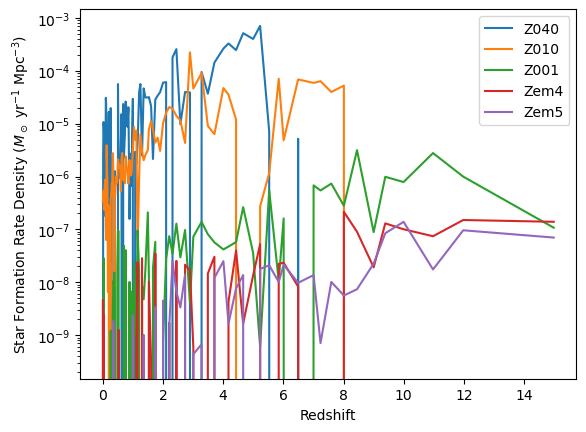

In [56]:
plt.plot(redshifts, scSFR_Z040, label='Z040')
#plt.plot(redshifts, SFR[1], label='Z030')
#plt.plot(redshifts, SFR[2], label='Z020')
plt.plot(redshifts, scSFR_Z010, label='Z010')
#plt.plot(redshifts, SFR[4], label='Z008')
#plt.plot(redshifts, SFR[5], label='Z006')
#plt.plot(redshifts, SFR[6], label='Z004')
#plt.plot(redshifts, SFR[7], label='Z003')
#plt.plot(redshifts, SFR[8], label='Z002')
plt.plot(redshifts, scSFR_Z001, label='Z001')
plt.plot(redshifts, scSFR_Zem4, label='Zem4')
plt.plot(redshifts, scSFR_Zem5, label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()